In [2]:
import pandas as pd
# 시각화 (폰트설정 및 그래프 라이브러리)
import seaborn as sns 
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
#폰트 경로 설정
fontpath = 'C:\Windows\Fonts\cambria.ttc'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)
#폰트 이름 설정
plt.rc('font', family='cambria') 
#폰트 업데이트
mpl.font_manager._rebuild()

#plt.style.use('ggplot')
#!pip install plotly --upgrade
#!pip uninstall -y datascience
#!pip uninstall -y branca
#!pip install git+https://github.com/python-visualization/branca.git@master



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


patient info파일에서 patient_id, sex, age, city,infection_case만을 사용핳수 있도록 컬럼 재 설정 후 연령에서 60대 이상인 노인들만 추출.

In [4]:
#노인 확진자 걸린 이유, 남녀별 걸린비율
howelderly = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
column_name = ['patient_id','sex','age','city','infection_case'] #가져올 컬럼명 설정
howelderly1 = howelderly[column_name] #필요한 컬럼만 추출
h1=howelderly1[(howelderly1["age"].notnull())] #age컬럼이 null값이 아닌것만 추출
h1=h1[(h1["infection_case"].notnull())] #infection_Case가 null값이 아닌것만 추출
h1 = h1[h1["age"].str.contains("60s|70s|80s|90s|100s")] #age컬럼의 60~100세 단어가 들어간 데이터만 추출


female    369
male      245
Name: sex, dtype: int64

노인의 연령별 성별 확진자 추이는 연령이 높아짐에따라 줄어듬. 대한민국의 인구 비율과 유사함


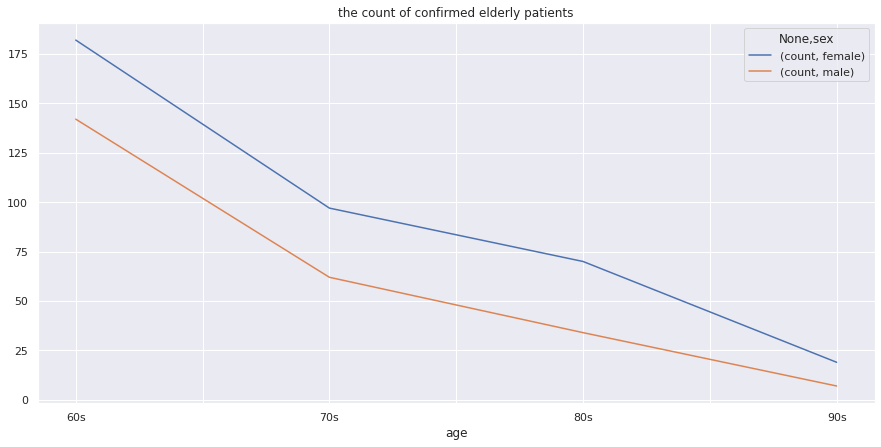

In [55]:
#노인의 연령별 성별 확진자 추이
h3 = h1.groupby(['age','sex']).count() #h1의 age와 sex를 기준으로 그룹을 묶어줌
h3 = h3.sort_values(by=['age'], ascending=True) # age순으로 올림차순 정리
h3.reset_index #인덱스 리셋
h3 = h3.drop(['city','infection_case'], axis=1) # city와 infectioncase 컬럼삭제
h3 = h3.drop(['100s']) # 100s가 들어간 행 삭제
h3.rename(columns = {'patient_id' : 'count'}, inplace = True) #컬럼명 변경
# plot data
fig, ax = plt.subplots(figsize=(15,7)) #차트 사이즈 지정
# use unstack()
h3.unstack().plot(ax=ax).set_title('the count of confirmed elderly patients') #언스택으로 데이터 쌏아서 차트 만들기
fig.savefig("the count of confirmed elderly patients.png")




감원원인으로는 환자와의 접촉이 가장 많다. 당연한 이야기...

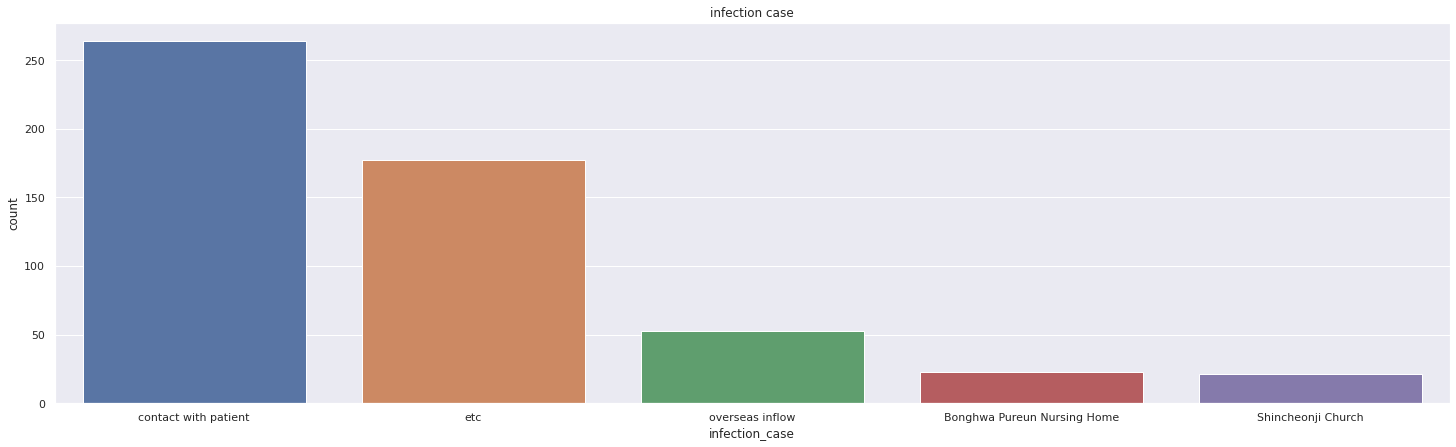

In [79]:
#감염원인
h7=h1["infection_case"].value_counts().reset_index() #각 감염 원인 별  수 계산하기
h7.rename(columns = {'infection_case' : 'count'}, inplace = True) #컬럼명 변경
h7.rename(columns = {'index' : 'infection_case'}, inplace = True) #컬럼명 변경
h7 = h7.iloc[0:5] #0~7번째 데이터까지만 사용
plt.figure(figsize=(25,7))
sns.set()
sns.barplot(x="infection_case", y="count", data=h7).set_title('infection case')
plt.savefig("infection case.png")


60대 이상 확진자 비율은 여성이 더 높으며 연령이 증가할수록 비율의 증가폭이 더 크다. 대한민국 인구 비율과 유사함.

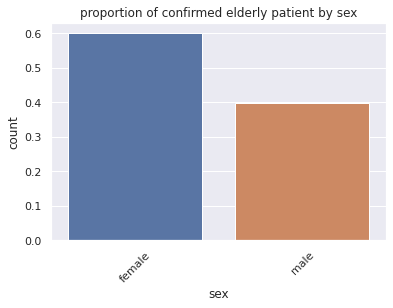

In [58]:
#60대 이상 확진자 남녀비율

h2=h1["sex"].value_counts(normalize=True).reset_index() #카운트를 비율로 계산해서 index재생성
h2.columns=["sex","count"]
h2
plt.xticks(rotation = 45 )
sns.barplot(x="sex", y="count", data=h2).set_title('proportion of confirmed elderly patient by sex')
plt.savefig("proportion of confirmed elderly patient by sex.png") 

Text(0.5, 1.0, 'Proportion of males and females by age of confirmed elderly patients')

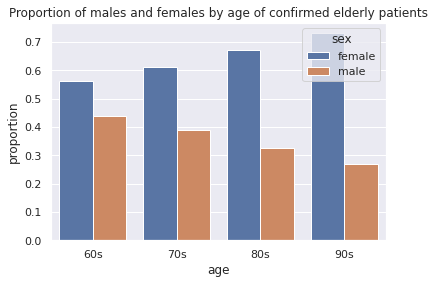

In [73]:
# 고령 확진자 연령별 남녀비율
h5 = h1['sex'].groupby(h1['age']).value_counts(normalize=True) #sex별 비율을 age로 그룹을 묶어 비율계산
h5 = h5.drop(['100s']) #100세는 표본값이 너무 적어 삭제
h5 = h5.reset_index(0)
h5.rename(columns = {'sex' : 'proportion'}, inplace = True)
h5 = h5.reset_index()
sns.barplot(x="age", y="proportion",hue='sex',order = ['60s', '70s', '80s','90s'], data=h5).set_title('Proportion of males and females by age of confirmed elderly patients')
plt.savefig("Proportion of males and females by age of confirmed elderly patients.png")

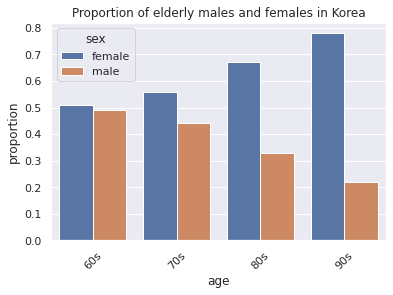

In [78]:
#대한민국의 노인 남녀 비율
korea = pd.read_excel('./data/대한민국인구.xlsx',encoding='utf-8' ) #엑셀불러오기
korea
plt.xticks(rotation = 45 )
sns.barplot(x="age", y="proportion",hue='sex',order = ['60s', '70s', '80s','90s'], data=korea).set_title('Proportion of elderly males and females in Korea')
plt.savefig("Proportion of elderly males and females in Korea.png")

남자가 치사율이 더 높음. 뉴욕과 비교해보니, 이는 우리나라만의 현상이 아니다.

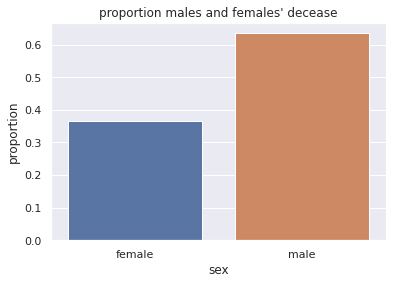

In [61]:
#남녀 치사율
deceased = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
column_name = ['sex','state'] #sex와 state 컬럼 사용
d1=deceased[column_name]
d2 = d1.loc[d1["state"].str.contains("deceased"),:] # state 컬럼에 deceased(사망자가)가 들어간 행만 추출
d3 = d2['sex'].groupby(d2['state']).value_counts(normalize=True) #sex별 비율을 state 로 그룹지어 비율 계산.
d3 = d3.reset_index(0)
d3.rename(columns = {'sex' : 'proportion'}, inplace = True)
d3 = d3.reset_index()
sns.barplot(x="sex", y="proportion", order = ['female', 'male'], data=d3).set_title("proportion males and females' decease")
plt.savefig("proportion males and females' decease.png")

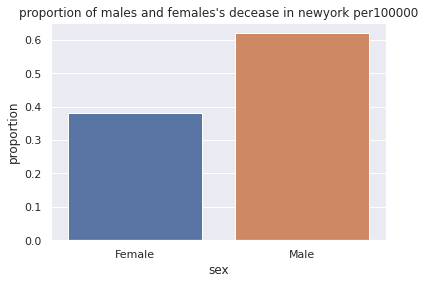

In [62]:
newyork = pd.read_csv('./data/newyorkdeath.csv', encoding='utf-8') #뉴옥 파일 가져오기
sns.barplot(x="sex", y="proportion", data=newyork).set_title("proportion of males and females's decease in newyork per100000")
plt.savefig("proportion of males and females's decease in newyork per100000.png")

노인 확진자 많이다닌곳으로 병원과 ETC는 아파서 간건지, 어디를 간건지 파악 힘듬. 다른 장소의 새로운 관점을 얻을 장소는 없었다.

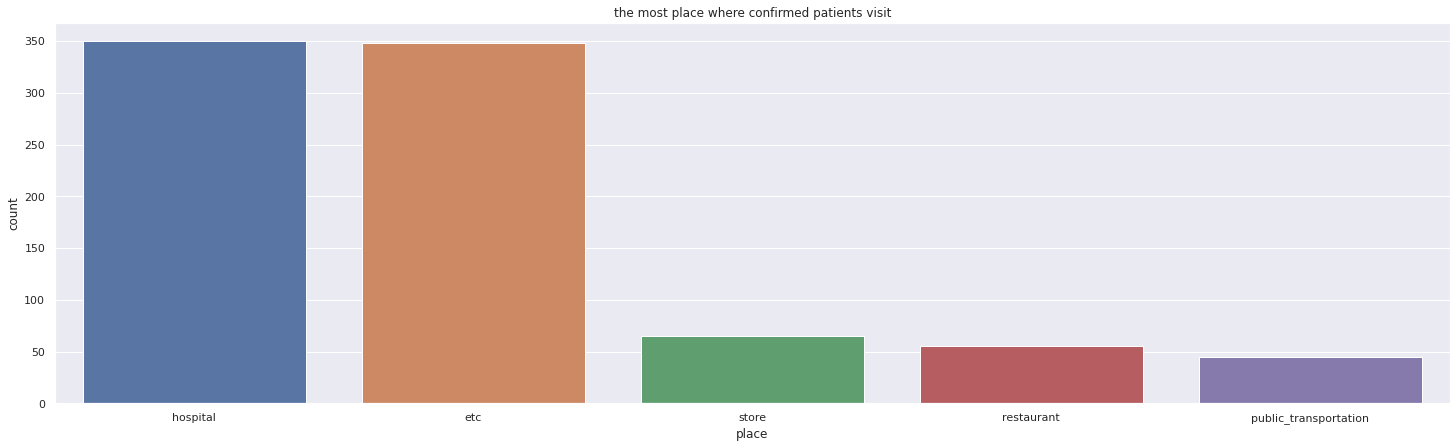

In [71]:
#노인 확진자 많이 다닌곳 
PatientInfo = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
PatientRoute = pd.read_csv('./data/PatientRoute.csv', encoding='utf-8')
data_result = pd.merge(PatientInfo, PatientRoute, on='patient_id')
column_name = ['patient_id','sex','age','city_x','city_y','type']
data_result = data_result[column_name]
d1=data_result[(data_result["age"].notnull())]
d1=data_result[(data_result["sex"].notnull())]
d1=data_result[(data_result["type"].notnull())]
d1 = d1[d1["age"].str.contains("60s|70s|80s|90s|100s", na=False)]
d1["type"].value_counts()
d2=d1["type"].value_counts()
d2 = d2.reset_index()
d2.rename(columns = {'index' : 'place'}, inplace = True)
d2.rename(columns = {'type' : 'count'}, inplace = True)
d2 =d2.iloc[0:5]
plt.figure(figsize=(25,7))
sns.barplot(x="place", y="count", data=d2).set_title('the most place where confirmed patients visit')
plt.savefig("the most place where confirmed patients visit.png", dpi=300)


노인들의 연령별 치료기간. 해외 데이터와 비교하려했었지만 해외의 연령별 치료기간 데이터를 구하지 못함.

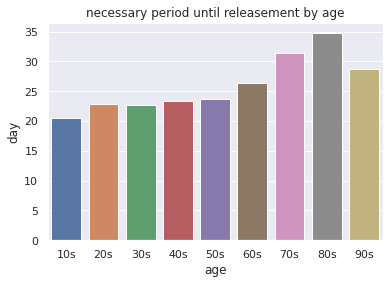

In [92]:
release = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
column_name = ['sex','age','confirmed_date','released_date']
release1 = release[column_name]
release1 = release1[release1["age"].str.contains("10s|20s|30s|40s|50s|60s|70s|80s|90s", na=False)] #age컬럼의 60대 이상값 추출, null값 제외
release1 = release1[(release1["confirmed_date"].notnull())]
release1 = release1[(release1["released_date"].notnull())]
release1['confirmed_date'] = release1['confirmed_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d")) # 확진날짜 데이터타입을 계산할수 있게 변경
release1['released_date'] = release1['released_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d")) # 완치날짜의 데이터타입을 계산할수 있게 변경
release1["day"] = release1['released_date'] - release1['confirmed_date'] # 두 날짜를 빼서 새로운 컬럼추가후 값 넣음
release1["day"] = release1["day"].dt.days # # 넣어진 값의 'day'글자 제거
releaseage = release1[["age","day"]].groupby("age").mean()
releaseage = releaseage.reset_index()
sns.barplot(x="age", y="day",order = ['10s','20s','30s','40s','50s','60s','70s', '80s','90s'], data=releaseage).set_title('necessary period until releasement by age')
plt.savefig("necessary period until releasement by age.png")

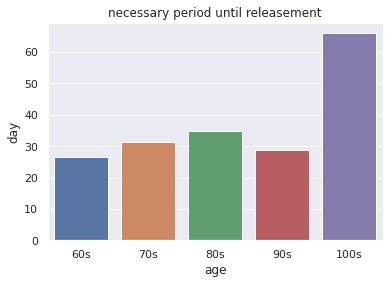

In [81]:
# 60세 이상 노년 완치까지 29일 10시간 # 60세 26, 70세 31, 80세 34, 90세 28, 100세 66 

from datetime import datetime, timedelta
import pandas as pd
import math
import numpy
release = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
column_name = ['sex','age','confirmed_date','released_date']
release1 = release[column_name]
release1 = release1[release1["age"].str.contains("60s|70s|80s|90s|100s", na=False)] #age컬럼의 60대 이상값 추출, null값 제외
release1 = release1[(release1["confirmed_date"].notnull())]
release1 = release1[(release1["released_date"].notnull())]
release1['confirmed_date'] = release1['confirmed_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d")) # 확진날짜 데이터타입을 계산할수 있게 변경
release1['released_date'] = release1['released_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d")) # 완치날짜의 데이터타입을 계산할수 있게 변경
release1["day"] = release1['released_date'] - release1['confirmed_date'] # 두 날짜를 빼서 새로운 컬럼추가후 값 넣음
release1["day"] = release1["day"].dt.days # # 넣어진 값의 'day'글자 제거
releaseage = release1[["age","day"]].groupby("age").mean()
releaseage = releaseage.reset_index()
sns.barplot(x="age", y="day",order = ['60s', '70s', '80s','90s','100s'], data=releaseage).set_title('necessary period until releasement')
plt.savefig("necessary period until releasement.png")


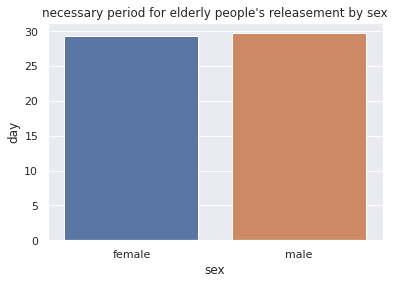

In [84]:
# 노인 남녀의 평균 완치기간은 29일로 동일
releasesex = release1[["sex","day"]].groupby("sex").mean()
releasesex = releasesex.reset_index()
sns.barplot(x="sex", y="day", data=releasesex).set_title("necessary period for elderly people's releasement by sex")
plt.savefig("necessary period for elderly people's releasement by sex.png")

60대 이상 확진자 비율과 도시별 노인인구 관계... 사건위주로 발생하기에 큰 상관없다 1.경산시 2.봉화시 3성남시...

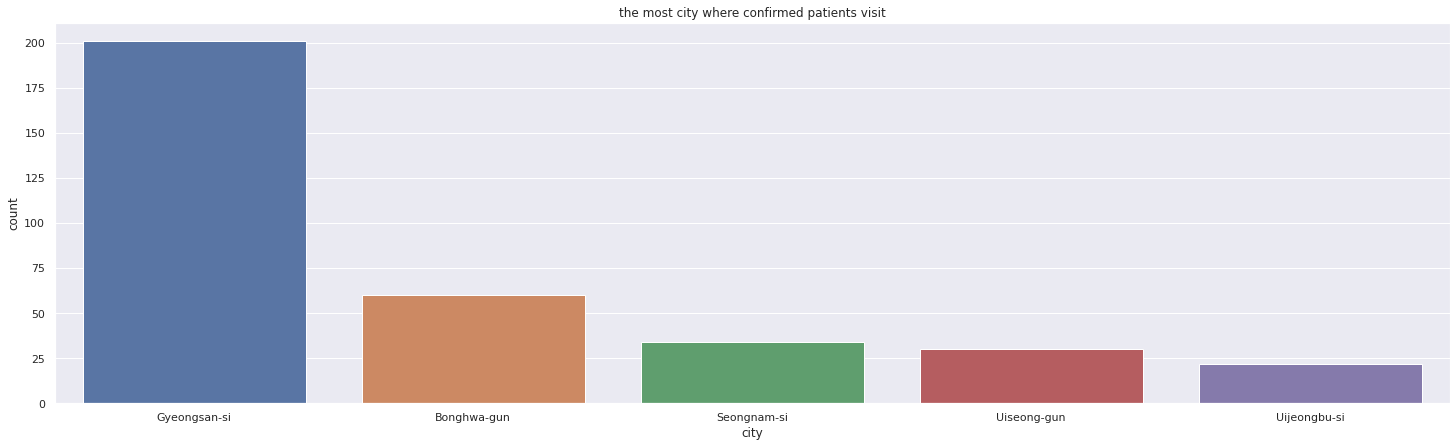

In [80]:
#60대 이상 확진자 비율과 도시별 노인인구 관계

patient = pd.read_csv('./data/PatientInfo.csv', encoding='utf-8')
column_name = ['age','city']
patientcity1 =  patient[column_name]
patientcity1 =  patientcity1[patientcity1["age"].str.contains("60s|70s|80s|90s|100s", na=False)]
patientcity1 = patientcity1["city"].value_counts()
patientcity2 = patientcity1.reset_index()
patientcity2.rename(columns = {'index' : 'city','city' : 'count'}, inplace = True)
patientcity2 =patientcity2.iloc[0:5]
patientcity2

plt.figure(figsize=(25,7))
sns.barplot(x="city", y="count", data=patientcity2).set_title('the most city where confirmed patients visit')
plt.savefig("the most city where confirmed patients occured.png", dpi=300)